In [1]:
import pandas as pd
import numpy as np

In [2]:
#datapath = '../Ram/Data_Sets/'
datapath = '../Ram/Data_Sets/'
filename = 'boston.csv'
trainfile = datapath+filename
sep = '\t'
dft = pd.read_csv(trainfile, sep=sep)
#dft.drop(['Churn2'],axis=1, inplace=True)
print(dft.shape)
target = ['MEDV']
dft.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
dft[target[0]] = dft[target[0]].fillna(0)
dft[target].isnull().sum()

MEDV    0
dtype: int64

In [4]:
preds = [x for x in list(dft) if x not in target]
len(preds)

13

In [5]:
##get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dft[preds], dft[target], test_size=0.20, random_state=1,
#                                                    stratify=dft[target]
                                                   )
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dft, test_size=0.20, random_state=1,
#                                                    stratify=dft[target]
                                                   )

In [7]:
import featurewiz as FW

Imported 0.1.997 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
correlation limit = 0.9
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (404, 14)
#### Single_Label Regression problem ####
loading the entire test dataframe - there is no nrows limit applicable #########
    Loaded test data. Shape = (102, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
##############################################

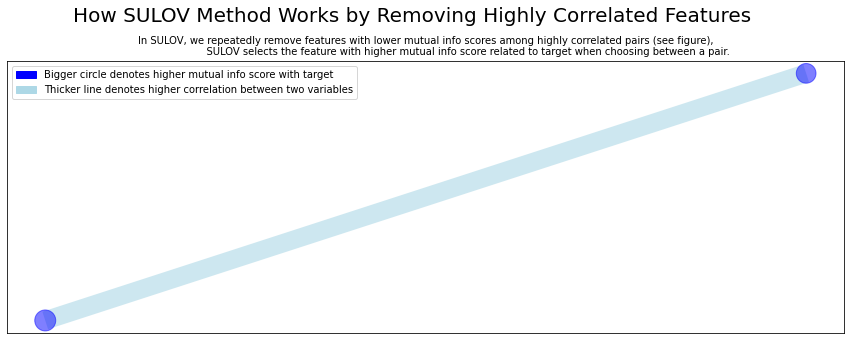

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 12
Final list of selected 12 vars after SULOV = ['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RM', 'ZN', 'TAX']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 12 
    Taking top 3 features per iteration...
    XGBoost version using 1.5.2 as tree method: hist
Number of booster rounds = 100
        using 12 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 10 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
      

In [14]:
trainm, testm = FW.featurewiz(train, target,  test_data=test, verbose=1,# corr_limit=0.90, 
#        sep=',', header=0,feature_engg='', category_encoders='',
#		dask_xgboost_flag=False, nrows=None
                             )

In [9]:
from featurewiz import simple_XGBoost_model
y_preds = simple_XGBoost_model(train[preds], train[target], test[preds])
ypreds1 = y_preds[0]

#### Single_Label Regression problem ####
# Simple XGBoost is a good choice compared to complex_XGBoost_model for Regression problems.
    Hyper Param Tuning XGBoost with CPU parameters. This will take time. Please be patient...
[0]	validation_0-rmse:22.44154
[1]	validation_0-rmse:21.76996
[2]	validation_0-rmse:21.13335
[3]	validation_0-rmse:20.49731
[4]	validation_0-rmse:19.90981
[5]	validation_0-rmse:19.30797
[6]	validation_0-rmse:18.74095
[7]	validation_0-rmse:18.19146
[8]	validation_0-rmse:17.64797
[9]	validation_0-rmse:17.16114
[10]	validation_0-rmse:16.62407
[11]	validation_0-rmse:16.12639
[12]	validation_0-rmse:15.63559
[13]	validation_0-rmse:15.15839
[14]	validation_0-rmse:14.72383
[15]	validation_0-rmse:14.30304
[16]	validation_0-rmse:13.89959
[17]	validation_0-rmse:13.49292
[18]	validation_0-rmse:13.11760
[19]	validation_0-rmse:12.75288
[20]	validation_0-rmse:12.41028
[21]	validation_0-rmse:12.06922
[22]	validation_0-rmse:11.72452
[23]	validation_0-rmse:11.39889
[24]	validati

0it [00:00, ?it/s]

RMSE score in fold 1 = 2.977173697116477
RMSE score in fold 2 = 3.611263064975329
RMSE score in fold 3 = 3.2843705435332997
RMSE score in fold 4 = 3.383184732837887
RMSE score in fold 5 = 3.006418342738492
    Time taken for Cross Validation of XGBoost (in minutes) = 0.1

Cross-validated Average scores are:  3.252482076240297
Training model on full train dataset...
    Time taken for training XGBoost (in minutes) = 0.0
Returning the following:
    final predictions [30.41788  28.410368 19.549873 20.595715 19.591265 20.225937 25.007622
 18.65737  21.864565 23.829147]
    Model = XGBRegressor(alpha=0.015, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             eval_metric='rmse', gamma=8, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.031446387626298145,
             max_delta_step=0, max_depth=8, min_child_weight=2, missing=nan,
             monotone_con

In [10]:
feats = testm.columns.tolist()
len(feats)

6

In [11]:
y_preds = simple_XGBoost_model(trainm[feats], trainm[target], testm[feats])
ypreds2 = y_preds[0]

#### Single_Label Regression problem ####
# Simple XGBoost is a good choice compared to complex_XGBoost_model for Regression problems.
    Hyper Param Tuning XGBoost with CPU parameters. This will take time. Please be patient...
[0]	validation_0-rmse:22.38506
[1]	validation_0-rmse:21.74566
[2]	validation_0-rmse:21.11743
[3]	validation_0-rmse:20.50002
[4]	validation_0-rmse:19.88286
[5]	validation_0-rmse:19.29656
[6]	validation_0-rmse:18.74860
[7]	validation_0-rmse:18.20086
[8]	validation_0-rmse:17.66310
[9]	validation_0-rmse:17.13972
[10]	validation_0-rmse:16.67624
[11]	validation_0-rmse:16.17764
[12]	validation_0-rmse:15.70590
[13]	validation_0-rmse:15.24260
[14]	validation_0-rmse:14.79668
[15]	validation_0-rmse:14.36594
[16]	validation_0-rmse:13.96215
[17]	validation_0-rmse:13.55664
[18]	validation_0-rmse:13.17717
[19]	validation_0-rmse:12.81302
[20]	validation_0-rmse:12.44554
[21]	validation_0-rmse:12.10055
[22]	validation_0-rmse:11.76230
[23]	validation_0-rmse:11.42632
[24]	validati

0it [00:00, ?it/s]

RMSE score in fold 1 = 3.3060150945700544
RMSE score in fold 2 = 3.559584607283754
RMSE score in fold 3 = 3.783236984277747
RMSE score in fold 4 = 3.6037810232239154
RMSE score in fold 5 = 3.335399673070716
    Time taken for Cross Validation of XGBoost (in minutes) = 0.1

Cross-validated Average scores are:  3.5176034764852373
Training model on full train dataset...
    Time taken for training XGBoost (in minutes) = 0.0
Returning the following:
    final predictions [31.001469 28.173975 20.603096 21.598976 18.233286 19.724012 25.600805
 18.874134 21.594769 22.505758]
    Model = XGBRegressor(alpha=0.015, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             eval_metric='rmse', gamma=8, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.031446387626298145,
             max_delta_step=0, max_depth=8, min_child_weight=2, missing=nan,
             monotone_c

Imported LazyTransformer version:1.00. Call by using:
    lazy = LazyTransformer(model=None, encoders='auto', scalers=None, date_to_string=False,
        transform_target=False, imbalanced=False, save=False, combine_rare=False, verbose=0)
    ### if you are not using a model in pipeline, you must use fit and transform ###
        X_trainm, y_trainm = lazy.fit_transform(X_train, y_train)
        X_testm = lazy.transform(X_test)
    ### If using a model in pipeline, use fit and predict only ###
        lazy.fit(X_train, y_train)
        lazy.predict(X_test)

    R-Squared = 91%


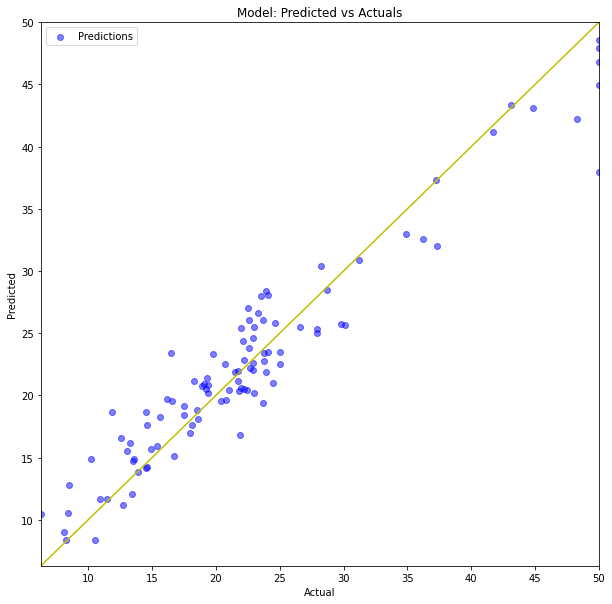

2.9051367221244933

In [12]:
from lazytransform import print_regression_model_stats, print_sulo_accuracy
print_regression_model_stats(test[target], ypreds1)
#print_sulo_accuracy(test[target], ypreds1,verbose=1)

    R-Squared = 92%


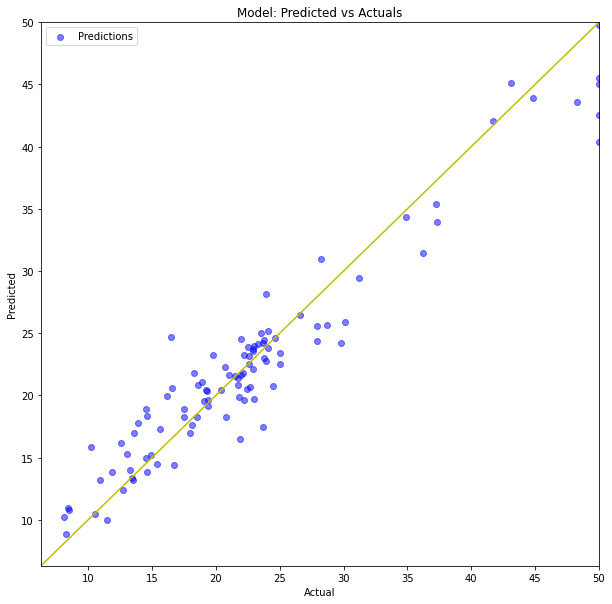

2.795406291173381

In [13]:
from lazytransform import print_regression_model_stats
print_regression_model_stats(test[target], ypreds2)
#print_sulo_accuracy(test[target], ypreds2,verbose=1)